<a href="https://colab.research.google.com/github/DanulR/Danul-Rochana-AI-Projects/blob/main/DanulRochanaMLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title 1.Linear Regression Model to predict The salary of a Data Scientist
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
#@title Importing the dataset

my_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ds_salaries.csv')

In [ ]:
#@title Here I'm going to build a linear regression model to predict the salary of the data science role based on the experience level 


In [ ]:
#@title Filtering the dataset and obtaining only the rows which has the role of the data scientist


my_data = my_data[my_data['job_title'] == 'Data Scientist']

In [ ]:
#@title Dropping the unnecessary features
my_data.drop(['work_year','employment_type','job_title','salary','salary_currency','employee_residence','remote_ratio','company_location','company_size'],axis = 1, inplace=True)

In [ ]:
my_data.head()

,experience_level,salary_in_usd
3,SE,175000
4,SE,120000
7,SE,219000
8,SE,141000
9,SE,147100


In [ ]:
#@title Dropping the rows with nan values
my_data.dropna(axis = 0, how='any', inplace= True)

In [ ]:
my_data['experience_level'].unique()

array(['SE', 'EX', 'MI', 'EN'], dtype=object)

In [ ]:
#@title Encoding the data in the column experience_level to numerical values
my_data['experience_level'] = my_data['experience_level'].map({'SE':1,'MI':2,'EN':3,'EX':4})

In [ ]:
my_data.head()

,experience_level,salary_in_usd
3,1,175000
4,1,120000
7,1,219000
8,1,141000
9,1,147100


In [ ]:
#@title Normalizing the dataset
my_data_mean = my_data.mean()
my_data_std = my_data.std()
my_data_norm = (my_data - my_data_mean)/my_data_std

In [ ]:
#@title Defining the input feature and the label
input_feature = my_data_norm['experience_level']
label = my_data_norm['salary_in_usd']

In [ ]:
#@title Building a simple linear regression model which has one hidden layer with one node for linear regression
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model




In [ ]:
#@title Model for training

def train_model(model, feature, label, epochs, batch_size):
    history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]
    return trained_weight, trained_bias, epochs, rmse

In [ ]:
#@title Calling the model and getting the loss values
learning_rate=0.01
epochs=50
my_batch_size=10

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, input_feature, 
                                                         label, epochs,
                                                         my_batch_size)

Epoch 1/50
84/84 [==============================] - 0s 2ms/step - loss: 0.9382 - root_mean_squared_error: 0.9686
Epoch 2/50
84/84 [==============================] - 0s 2ms/step - loss: 0.9062 - root_mean_squared_error: 0.9519
Epoch 3/50
84/84 [==============================] - 0s 1ms/step - loss: 0.8832 - root_mean_squared_error: 0.9398
Epoch 4/50
84/84 [==============================] - 0s 2ms/step - loss: 0.8674 - root_mean_squared_error: 0.9313
Epoch 5/50
84/84 [==============================] - 0s 1ms/step - loss: 0.8555 - root_mean_squared_error: 0.9249
Epoch 6/50
84/84 [==============================] - 0s 1ms/step - loss: 0.8480 - root_mean_squared_error: 0.9208
Epoch 7/50
84/84 [==============================] - 0s 1ms/step - loss: 0.8429 - root_mean_squared_error: 0.9181
Epoch 8/50
84/84 [==============================] - 0s 1ms/step - loss: 0.8401 - root_mean_squared_error: 0.9166
Epoch 9/50
84/84 [==============================] - 0s 2ms/step - loss: 0.8378 - root_mean_squar

In [ ]:
#@title 2.Neural Network for Predicting the salary of a Data Scientist

In [ ]:
#@title importing all the relvant modules
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
#@title importing the dataset

my_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/ds_salaries.csv')

In [ ]:
#@title Dropping all the unnecessary columns.
my_data.drop(['salary','salary_currency','remote_ratio','work_year'],axis = 1, inplace=True)

In [ ]:
#@title Removing all the rows with null values
my_data.dropna(axis = 0, how='any', inplace= True)

In [ ]:
#@title Obtaining the rows which only has the job title "Data Scientist"
my_data = my_data[my_data['job_title'] == 'Data Scientist']

In [ ]:
my_data.head()

,experience_level,employment_type,job_title,salary_in_usd,employee_residence,company_location,company_size
3,SE,FT,Data Scientist,175000,CA,CA,M
4,SE,FT,Data Scientist,120000,CA,CA,M
7,SE,FT,Data Scientist,219000,CA,CA,M
8,SE,FT,Data Scientist,141000,CA,CA,M
9,SE,FT,Data Scientist,147100,US,US,M


In [ ]:
#@title Droping the job title column as it is not needed anymore
my_data.drop(['job_title'],axis = 1, inplace = True)

In [ ]:
my_data.head()

,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
3,SE,FT,175000,CA,CA,M
4,SE,FT,120000,CA,CA,M
7,SE,FT,219000,CA,CA,M
8,SE,FT,141000,CA,CA,M
9,SE,FT,147100,US,US,M


In [ ]:
#@title Converting the categorical labels which are in string mode to numeric mode
my_data['experience_level'].unique()

array(['SE', 'EX', 'MI', 'EN'], dtype=object)

In [ ]:
my_data['experience_level'] = my_data['experience_level'].map({'SE':1,'MI':2,'EN':3,'EX':4})

In [ ]:
my_data.head()

,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
3,1,FT,175000,CA,CA,M
4,1,FT,120000,CA,CA,M
7,1,FT,219000,CA,CA,M
8,1,FT,141000,CA,CA,M
9,1,FT,147100,US,US,M


In [ ]:
my_data['employment_type'].unique()

array(['FT', 'PT', 'FL'], dtype=object)

In [ ]:
my_data['employment_type'] = my_data['employment_type'].map({'FT':4,'PT':5,'FL':6})

In [ ]:
my_data.head()

,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
3,1,4,175000,CA,CA,M
4,1,4,120000,CA,CA,M
7,1,4,219000,CA,CA,M
8,1,4,141000,CA,CA,M
9,1,4,147100,US,US,M


In [ ]:
my_data['employee_residence'].unique()

array(['CA', 'US', 'HK', 'ES', 'GB', 'IE', 'CH', 'DE', 'AT', 'IN', 'FR',
       'BR', 'CY', 'LV', 'RO', 'TH', 'HU', 'MX', 'AU', 'TR', 'NL', 'DO',
       'BE', 'JP', 'PL', 'RU', 'DZ', 'GR', 'UA', 'NG', 'PH', 'RS', 'CL',
       'IT', 'SG'], dtype=object)

In [ ]:
my_data['employee_residence'] = my_data['employee_residence'].map({'CA':7, 'US':8, 'HK':9, 'ES':10, 'GB':11, 'IE':12, 'CH':13, 'DE':14, 'AT':15, 'IN':16, 'FR':17,
       'BR':18, 'CY':19, 'LV':20, 'RO':21, 'TH':22, 'HU':23, 'MX':24, 'AU':25, 'TR':26, 'NL':27, 'DO':28,
       'BE':29, 'JP':30, 'PL':31, 'RU':32, 'DZ':33, 'GR':34, 'UA':35, 'NG':36, 'PH':37, 'RS':38, 'CL':39,
       'IT':40, 'SG':41})

In [ ]:
my_data.head()

,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
3,1,4,175000,7,CA,M
4,1,4,120000,7,CA,M
7,1,4,219000,7,CA,M
8,1,4,141000,7,CA,M
9,1,4,147100,8,US,M


In [ ]:
my_data['company_location'].unique()

array(['CA', 'US', 'HK', 'ES', 'GB', 'IE', 'CH', 'DE', 'IN', 'FR', 'BR',
       'EE', 'LV', 'RO', 'TH', 'HU', 'MX', 'AU', 'TR', 'NL', 'BE', 'ID',
       'MY', 'PL', 'DZ', 'UA', 'NG', 'CL', 'AT', 'IT', 'LU', 'IL'],
      dtype=object)

In [ ]:
my_data['company_location'] = my_data['company_location'].map({'CA':42, 'US':43, 'HK':44, 'ES':45, 'GB':46, 'IE':47, 'CH':48, 'DE':49, 'IN':50, 'FR':51, 'BR':52,
       'EE':53, 'LV':54, 'RO':55, 'TH':56, 'HU':57, 'MX':58, 'AU':59, 'TR':60, 'NL':61, 'BE':62, 'ID':63,
       'MY':64, 'PL':65, 'DZ':66, 'UA':67, 'NG':68, 'CL':69, 'AT':70, 'IT':71, 'LU':72, 'IL':73})

In [ ]:
my_data.head()

,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
3,1,4,175000,7,42,M
4,1,4,120000,7,42,M
7,1,4,219000,7,42,M
8,1,4,141000,7,42,M
9,1,4,147100,8,43,M


In [ ]:
my_data['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [ ]:
my_data['company_size'] = my_data['company_size'].map({'S':74,'M':75,'L':76})

In [ ]:
#@title This is how the dataset looks after preprocessing is done
my_data.head()

,experience_level,employment_type,salary_in_usd,employee_residence,company_location,company_size
3,1,4,175000,7,42,75
4,1,4,120000,7,42,75
7,1,4,219000,7,42,75
8,1,4,141000,7,42,75
9,1,4,147100,8,43,75


In [ ]:
#@title Splitting the dataset into training and test dataset
train_data, test_data = train_test_split(my_data, test_size = 0.2, random_state=1)

In [ ]:
#@title Normalizing the dataset
train_data_mean = train_data.mean()
train_data_std = train_data.std()
train_data_norm = (train_data - train_data_mean)/train_data_std

# Calculate the Z-scores of each column in the test set.
test_data_mean = test_data.mean()
test_data_std = test_data.std()
test_data_norm = (test_data - test_data_mean)/test_data_std

print("Normalized the values.")

Normalized the values.


In [ ]:
#@title Creating an array with feartures
feature_columns=[]
experience_level = tf.feature_column.numeric_column("experience_level")
feature_columns.append(experience_level)


employment_type = tf.feature_column.numeric_column("employment_type")
feature_columns.append(employment_type)

employee_residence = tf.feature_column.numeric_column("employee_residence")
feature_columns.append(employee_residence)


company_location = tf.feature_column.numeric_column("company_location")
feature_columns.append(company_location)

company_size = tf.feature_column.numeric_column("company_size")
feature_columns.append(company_size)

my_feature_layer = tf.keras.layers.DenseFeatures(feature_columns)


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


In [ ]:
#@title Defining code to plot a loss curve
def plot_the_loss_curve(epochs, mse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(epochs, mse, label="Loss")
  plt.legend()
  plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [ ]:
#@title Creating a neural network which has 20 nodes in the first hidden layer and 12 nodes in the second hidden layer and gives a single value as output
def create_model(my_learning_rate, my_feature_layer):
  model = tf.keras.models.Sequential()
  model.add(my_feature_layer)
  model.add(tf.keras.layers.Dense(units=20, 
                                  activation='relu', 
                                  name='Hidden1'))
  
  
  model.add(tf.keras.layers.Dense(units=12, 
                                  activation='relu', 
                                  name='Hidden2'))
  
  
  model.add(tf.keras.layers.Dense(units=1,  
                                  name='Output'))                              
  
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])

  return model

In [ ]:
#@title Defining the model for training the data
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
  """Train the model by feeding it data."""

  # Split the dataset into features and label.
  features = {name:np.array(value) for name, value in dataset.items()}
  label = np.array(features.pop(label_name))
  history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # To track the progression of training, gather a snapshot
  # of the model's mean squared error at each epoch. 
  hist = pd.DataFrame(history.history)
  mse = hist["mean_squared_error"]

  return epochs, mse

Epoch 1/150


14/14 [==============================] - 1s 3ms/step - loss: 0.9678 - mean_squared_error: 0.9678
Epoch 2/150
14/14 [==============================] - 0s 3ms/step - loss: 0.7413 - mean_squared_error: 0.7413
Epoch 3/150
14/14 [==============================] - 0s 3ms/step - loss: 0.6557 - mean_squared_error: 0.6557
Epoch 4/150
14/14 [==============================] - 0s 3ms/step - loss: 0.6314 - mean_squared_error: 0.6314
Epoch 5/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6364 - mean_squared_error: 0.6364
Epoch 6/150
14/14 [==============================] - 0s 4ms/step - loss: 0.6224 - mean_squared_error: 0.6224
Epoch 7/150
14/14 [==============================] - 0s 3ms/step - loss: 0.6053 - mean_squared_error: 0.6053
Epoch 8/150
14/14 [==============================] - 0s 3ms/step - loss: 0.5983 - mean_squared_error: 0.5983
Epoch 9/150
14/14 [==============================] - 0s 4ms/step - loss: 0.5905 - mean_squared_error: 0.5905
Epoch 10/150
14/14 [===========

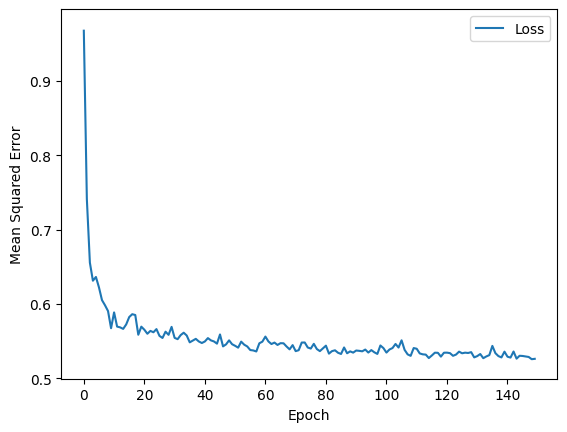

In [ ]:
#@title Calling the Model and achieveing minimum Loss
learning_rate = 0.01
epochs = 150
batch_size = 50

# Specify the label
label_name = "salary_in_usd"

# Establish the model's topography.
my_model = create_model(learning_rate, my_feature_layer)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined by the feature_layer.
epochs, mse = train_model(my_model, train_data_norm, epochs, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

